In [1]:
# Modules Import
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Import Data Set
car_sales=pd.read_csv("D:\\MyEnvironment\\Jupyter-Notebook\\Notebooks\\Dataset\\car_sales_extended.csv")


In [2]:
# Creating DataFrames and Series
df=pd.DataFrame(car_sales)
ser=pd.Series(df["Make"])

# Finding types 
type(df)
df.dtypes
type(ser)
ser.dtypes


dtype('O')

### Basic Mehtods and Attributes

In [3]:
# Return all the column names
car_sales.columns
# Data Types of Columns
car_sales.dtypes
# .head() : Top 5 Rows
car_sales.head()
# .tail() : Bottum 5 Rows
car_sales.tail()
# get Start, End, Step info of DF
car_sales.index
# get statistical description of DF
car_sales.describe()
# get info of DF
# car_sales.info()
# Calculate Mean of Given Column
# car_sales["Price"].mean()
# Calculate Mode of Given Column
car_sales["Doors"].mode()
# Calculate Median of Given Column
car_sales["Price"].median()




13362.0

## loc & iloc


**Loc**  :
* loc = LOCation (Label/Name based)
* Labed-based indexing,
* It'll give you rows and cols by name,
* It includes both start and end in slicing,
* Can have duplicate 'Labeled indexs'
* __Loc Basically follows the Labled indices, it can be any modified indexing__

In [4]:
# make sure the number of rows matches the custom index, then access the row by label
# df_1 = pd.DataFrame({"Names": df["Make"].head(5)}, index=[0,1,2,3,4])
df_1=pd.DataFrame(df.head(10)).sort_values(by="Price")
df_1

,Make,Colour,Odometer,Doors,Price
4,Nissan,White,213095,4,3500
0,Toyota,White,150043,4,4000
5,Toyota,Green,99213,4,4500
1,Honda,Red,87899,4,5000
8,Toyota,White,60000,4,6250
2,Toyota,Blue,32549,3,7000
7,Honda,Blue,54738,4,7000
6,Honda,Blue,45698,4,7500
9,Nissan,White,31600,4,9700
3,BMW,Black,11179,5,22000


In [5]:
df_1.loc[5] # will return the '5' Index-Labeled Row 



Make        Toyota
Colour       Green
Odometer     99213
Doors            4
Price         4500
Name: 5, dtype: object

**Iloc**:
* iloc = Integer LOCation (Position/Number based)
* Integer-based Indexing
* It follows 0 indexing
* Slicing will not include end
* Can NOT have duplicate Indexes
* __Iloc Follows the ACTUAL order indexing of  the table/Dataframe__ 

In [6]:
df_1.iloc[5]



Make        Toyota
Colour        Blue
Odometer     32549
Doors            3
Price         7000
Name: 2, dtype: object

### Loc & Iloc Slicing

##### * _Problem with loc slicing is we need to slice it carefully, because it slices based on labeled indexes regardless of number size._

* E.g., loc[8:5] slices from Labeled '8' to Labeled '5', while 8 is bigger number

##### * _Negative Indexing Doesn't Work on loc_

* E.g., loc[-1] < Error

In [7]:
# loc Slicing
df_1.loc[8:5] # will slice labeled rows

,Make,Colour,Odometer,Doors,Price


In [8]:
# Iloc slicing
df_1.iloc[0:5]

,Make,Colour,Odometer,Doors,Price
4,Nissan,White,213095,4,3500
0,Toyota,White,150043,4,4000
5,Toyota,Green,99213,4,4500
1,Honda,Red,87899,4,5000
8,Toyota,White,60000,4,6250


In [224]:
# Checking Duplicate indexes on loc and iloc 
animal=pd.DataFrame(["fox","lion","cat"],index=[3,2,3])
animal.loc[3] # return all rows with index '3'
animal.iloc[3] # Error (Number of order can't be same)

,0
3,fox
3,cat


### Selecting Columns

In [ ]:
# Method 1
make=car_sales["Make"].head(10)
make

0    Toyota
1     Honda
2    Toyota
3       BMW
4    Nissan
5    Toyota
6     Honda
7     Honda
8    Toyota
9    Nissan
Name: Make, dtype: object

In [ ]:
# Method 2
make=car_sales.Make.head(10) # This method only works when there are no spaces in column name
make

0    Toyota
1     Honda
2    Toyota
3       BMW
4    Nissan
5    Toyota
6     Honda
7     Honda
8    Toyota
9    Nissan
Name: Make, dtype: object

## Pandas Queries

In [ ]:

df[df["Make"]== "Toyota"]

,Make,Colour,Odometer,Doors,Price
0,Toyota,White,150043,4,4000
2,Toyota,Blue,32549,3,7000
5,Toyota,Green,99213,4,4500
8,Toyota,White,60000,4,6250
11,Toyota,Grey,122642,4,4317
34,Toyota,Yellow,238964,3,3355
36,Toyota,Grey,156974,2,12143
47,Toyota,Black,131409,5,3005
48,Toyota,Grey,35052,4,16621
49,Toyota,Blue,83796,4,8341


#### Crosstab: It aggeragate two columns and summarize columns

``pd.crosstab(index, columns)``

In [226]:
toyota_df=df[df["Make"] == "Toyota"]
pd.crosstab(toyota_df["Make"],toyota_df["Colour"])
# toyota_df

Colour,Blue,Green,White
Make,,,
Toyota,1,1,2


### Calculatin Mean of Columns

##### Method 1 
``numeric_only=True``

In [ ]:
df.groupby(["Make"]).mean(numeric_only=True)
df.groupby(["Make"])

,Odometer,Doors,Price
Make,,,
BMW,98753.600000,4.300000,17849.400000
Chevrolet,180652.666667,3.166667,14683.166667
Ford,143301.000000,3.000000,14961.416667
Honda,152188.916667,3.500000,9727.000000
Hyundai,101865.333333,3.333333,16557.066667
Kia,124977.166667,3.250000,11294.500000
Mazda,99878.600000,3.866667,15145.333333
Mercedes,157873.142857,3.857143,13295.714286
Nissan,115022.800000,3.300000,13430.500000


##### Method 2 Specifing Only Numercial Columns

In [ ]:
df.groupby(["Make"])[["Odometer","Doors"]].mean()

np.int64(7000)

## Ploting Data 
### Using Magic Commands and Matplotlib

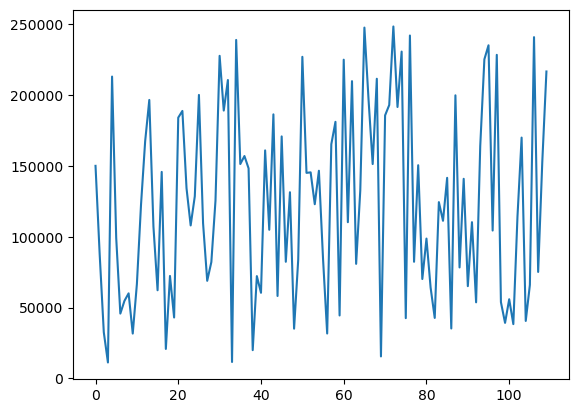

In [ ]:
%matplotlib inline
df["Odometer"].plot()
plt.show()

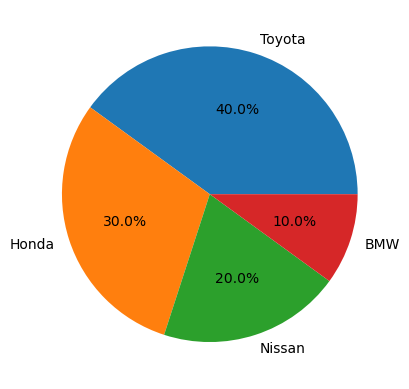

In [229]:
make=df["Make"]
countOfMake=pd.Series(make).value_counts()

plt.pie(countOfMake, labels=countOfMake.index, autopct='%1.1f%%')
plt.show()

In [ ]:
df.dtypes

Make        object
Colour      object
Odometer     int64
Doors        int64
Price        int64
dtype: object

---
## Manipulating Data
    1,Analyzing
    2,Modfying
    3,Handle Missing Data (Fill/Drop)
    4,Saving
    5,Exporting

In [35]:
# A New Dirty Dataset 
data = {
    'Make': ['Toyota', 'Honda', 'Ford', 'BMW', 'Nissan', np.nan, 'Honda', 'Ford', 'Toyota', 'Nissan'],
    'Price': ['$4,000', '$5,000', '$12,000', '$22,000', '$3,500', '$7,000', np.nan, '$4,500', '$6,200', '$9,000'],
    'Odometer (KM)': [150043, 87899, 32549, 11179, 213095, np.nan, 45698, 60000, 31600, 85000],
    'Doors': ['4', '4', '2', '5', '4', '4', '4', '2', np.nan, '4']
}

df = pd.DataFrame(data)

### Analyzing 

In [51]:
df

,Make,Price,Odometer (KM),Doors
0,Toyota,4000.000000,150043.0,4
1,Honda,5000.000000,87899.0,4
2,Ford,12000.000000,32549.0,2
3,BMW,22000.000000,11179.0,5
4,Nissan,3500.000000,213095.0,4
5,NaN,7000.000000,NaN,4
6,Honda,8133.333333,45698.0,4
7,Ford,4500.000000,60000.0,2
8,Toyota,6200.000000,31600.0,NaN
9,Nissan,9000.000000,85000.0,4


In [72]:
df.dtypes

Make             object
Price             int64
Odometer (KM)     int64
Doors             int64
dtype: object

### Modification and Cleaning

In [ ]:

# Cleaning 'Price' Column
df["Price"]=df["Price"].str.replace(r'[\$,]','',regex=True)
df["Price"]=pd.to_numeric(df["Price"],errors="coerce")
df["Price"]=df["Price"].fillna(df["Price"].mean())
df["Price"]=df["Price"].astype(int)

In [ ]:
# Cleaning 'Odometer (KM)' Column
df["Odometer (KM)"]=df["Odometer (KM)"].fillna(df["Odometer (KM)"].mean())
df["Odometer (KM)"]=df["Odometer (KM)"].astype(int)

In [ ]:
# Cleaning 'Doors' Column
df["Doors"]=df["Doors"].str.replace(r'[\$,]','',regex=True)
df["Doors"]=pd.to_numeric(df["Doors"],errors='coerce')
df["Doors"]=df["Doors"].fillna(df["Doors"].mean())
df["Doors"]=df["Doors"].astype(int)

In [ ]:
df['subject'] = df[subject].eq('English').idxmax() = 'computer'

In [ ]:
# Cleaning 'Make' Column
df=df.dropna()

### Export and Save

In [ ]:
df.to_csv("Cleaned_car_sales.csv",index=False) # index=False to avoid double indexes

In [63]:
df.dtypes

Make             object
Price             int64
Odometer (KM)     int64
Doors             int64
dtype: object

In [69]:
df

,Make,Price,Odometer (KM),Doors
0,Toyota,4000,150043,4
1,Honda,5000,87899,4
2,Ford,12000,32549,2
3,BMW,22000,11179,5
4,Nissan,3500,213095,4
6,Honda,8133,45698,4
7,Ford,4500,60000,2
8,Toyota,6200,31600,3
9,Nissan,9000,85000,4


---

### 

In [74]:
df=pd.read_csv('D:\\MyEnvironment\\Jupyter-Notebook\\Notebooks\\Dataset\\car-sales.csv')
df

,Make,Colour,Odometer (KM),Doors,Price
0,Toyota,White,150043,4,"$4,000.00"
1,Honda,Red,87899,4,"$5,000.00"
2,Toyota,Blue,32549,3,"$7,000.00"
3,BMW,Black,11179,5,"$22,000.00"
4,Nissan,White,213095,4,"$3,500.00"
5,Toyota,Green,99213,4,"$4,500.00"
6,Honda,Blue,45698,4,"$7,500.00"
7,Honda,Blue,54738,4,"$7,000.00"
8,Toyota,White,60000,4,"$6,250.00"
9,Nissan,White,31600,4,"$9,700.00"


## Creating a column and adding it to the dataset

In [75]:
seats=pd.Series([5]*10)
seats

0    5
1    5
2    5
3    5
4    5
5    5
6    5
7    5
8    5
9    5
dtype: int64

In [78]:
df["Seats"]=seats

In [ ]:
# Creating a column of constant value
df["Wheels"]=4

In [80]:
df

,Make,Colour,Odometer (KM),Doors,Price,Seats,Wheels
0,Toyota,White,150043,4,"$4,000.00",5,4
1,Honda,Red,87899,4,"$5,000.00",5,4
2,Toyota,Blue,32549,3,"$7,000.00",5,4
3,BMW,Black,11179,5,"$22,000.00",5,4
4,Nissan,White,213095,4,"$3,500.00",5,4
5,Toyota,Green,99213,4,"$4,500.00",5,4
6,Honda,Blue,45698,4,"$7,500.00",5,4
7,Honda,Blue,54738,4,"$7,000.00",5,4
8,Toyota,White,60000,4,"$6,250.00",5,4
9,Nissan,White,31600,4,"$9,700.00",5,4


### Droping A Column

In [82]:

df.drop("Wheels",axis=1)
# df=df.drop("Wheels",axis=1) 


,Make,Colour,Odometer (KM),Doors,Price,Seats
0,Toyota,White,150043,4,"$4,000.00",5
1,Honda,Red,87899,4,"$5,000.00",5
2,Toyota,Blue,32549,3,"$7,000.00",5
3,BMW,Black,11179,5,"$22,000.00",5
4,Nissan,White,213095,4,"$3,500.00",5
5,Toyota,Green,99213,4,"$4,500.00",5
6,Honda,Blue,45698,4,"$7,500.00",5
7,Honda,Blue,54738,4,"$7,000.00",5
8,Toyota,White,60000,4,"$6,250.00",5
9,Nissan,White,31600,4,"$9,700.00",5


,Make,Colour,Odometer (KM),Doors,Price,Seats,Wheels
0,Toyota,White,150043,4,"$4,000.00",5,4
1,Honda,Red,87899,4,"$5,000.00",5,4
2,Toyota,Blue,32549,3,"$7,000.00",5,4
3,BMW,Black,11179,5,"$22,000.00",5,4
4,Nissan,White,213095,4,"$3,500.00",5,4
5,Toyota,Green,99213,4,"$4,500.00",5,4
6,Honda,Blue,45698,4,"$7,500.00",5,4
7,Honda,Blue,54738,4,"$7,000.00",5,4
8,Toyota,White,60000,4,"$6,250.00",5,4
9,Nissan,White,31600,4,"$9,700.00",5,4


### Shuffling Data

In [87]:
df_shuffled=df.sample(frac=True)

In [ ]:
data = {'Salary':[12,23,23]}
df =pd.DataFrame(data)

a =df.loc['Salary'].str.replace(df['S'])


In [85]:
df_shuffled

,Make,Colour,Odometer (KM),Doors,Price,Seats,Wheels
5,Toyota,Green,99213,4,"$4,500.00",5,4
9,Nissan,White,31600,4,"$9,700.00",5,4
3,BMW,Black,11179,5,"$22,000.00",5,4
7,Honda,Blue,54738,4,"$7,000.00",5,4
1,Honda,Red,87899,4,"$5,000.00",5,4
8,Toyota,White,60000,4,"$6,250.00",5,4
2,Toyota,Blue,32549,3,"$7,000.00",5,4
6,Honda,Blue,45698,4,"$7,500.00",5,4
4,Nissan,White,213095,4,"$3,500.00",5,4
0,Toyota,White,150043,4,"$4,000.00",5,4


### Creating new indices for shuffled dataset

In [89]:
df_shuffled.reset_index(drop=True,inplace=True)

In [90]:
df_shuffled

,Make,Colour,Odometer (KM),Doors,Price,Seats,Wheels
0,Toyota,White,60000,4,"$6,250.00",5,4
1,Nissan,White,213095,4,"$3,500.00",5,4
2,Honda,Blue,45698,4,"$7,500.00",5,4
3,Honda,Red,87899,4,"$5,000.00",5,4
4,Toyota,Green,99213,4,"$4,500.00",5,4
5,Toyota,White,150043,4,"$4,000.00",5,4
6,Honda,Blue,54738,4,"$7,000.00",5,4
7,BMW,Black,11179,5,"$22,000.00",5,4
8,Toyota,Blue,32549,3,"$7,000.00",5,4
9,Nissan,White,31600,4,"$9,700.00",5,4


### Apply Function on entire column

#### Using Lambda Funciton

In [91]:
df_shuffled["Odometer (KM)"]=df_shuffled["Odometer (KM)"].apply(lambda x:x/1.6).round(3)

### Renaming Column

In [92]:
df_shuffled.rename(columns={"Odometer (KM)":"Odometer (Miles)"})


,Make,Colour,Odometer (Miles),Doors,Price,Seats,Wheels
0,Toyota,White,37500.000,4,"$6,250.00",5,4
1,Nissan,White,133184.375,4,"$3,500.00",5,4
2,Honda,Blue,28561.250,4,"$7,500.00",5,4
3,Honda,Red,54936.875,4,"$5,000.00",5,4
4,Toyota,Green,62008.125,4,"$4,500.00",5,4
5,Toyota,White,93776.875,4,"$4,000.00",5,4
6,Honda,Blue,34211.250,4,"$7,000.00",5,4
7,BMW,Black,6986.875,5,"$22,000.00",5,4
8,Toyota,Blue,20343.125,3,"$7,000.00",5,4
9,Nissan,White,19750.000,4,"$9,700.00",5,4


In [93]:
df_shuffled

,Make,Colour,Odometer (KM),Doors,Price,Seats,Wheels
0,Toyota,White,37500.000,4,"$6,250.00",5,4
1,Nissan,White,133184.375,4,"$3,500.00",5,4
2,Honda,Blue,28561.250,4,"$7,500.00",5,4
3,Honda,Red,54936.875,4,"$5,000.00",5,4
4,Toyota,Green,62008.125,4,"$4,500.00",5,4
5,Toyota,White,93776.875,4,"$4,000.00",5,4
6,Honda,Blue,34211.250,4,"$7,000.00",5,4
7,BMW,Black,6986.875,5,"$22,000.00",5,4
8,Toyota,Blue,20343.125,3,"$7,000.00",5,4
9,Nissan,White,19750.000,4,"$9,700.00",5,4


# Numpy

### Numpy Datatypes and Attributes

### Creating Numpy Array 1D

In [94]:
arr1=np.array([1,2,3])
arr1

array([1, 2, 3])

In [95]:
arr1.dtype

dtype('int64')

In [97]:
type(arr1)

numpy.ndarray

### 2D Array

In [100]:
arr2=np.array([[1,2,3],[4,5,6],[7,8,9]])
arr2

array([[1, 2, 3],
       [4, 5, 6],
       [7, 8, 9]])

### 3D Array

In [101]:
arr3=np.array([[[1,2,3],[4,5,6],[7,8,9]],
               [[10,11,12],[13,14,15],[16,17,18]],
               [[19,20,21],[22,23,24],[25,26,27]]])
arr3

array([[[ 1,  2,  3],
        [ 4,  5,  6],
        [ 7,  8,  9]],

       [[10, 11, 12],
        [13, 14, 15],
        [16, 17, 18]],

       [[19, 20, 21],
        [22, 23, 24],
        [25, 26, 27]]])

### Find Shape of Array

In [102]:
arr3.shape

(3, 3, 3)

### Find Dimensions of Array

In [103]:
arr3.ndim

3

### Create a dataframe from numpy array

In [110]:
# df=pd.DataFrame(arr1) 
# df=pd.DataFrame(arr3) # Error because DataFrame can't be 3D
df=pd.DataFrame(arr2)
df


,0,1,2
0,1,2,3
1,4,5,6
2,7,8,9


### Ones Array

In [113]:
ones=np.ones((2,3))
ones

array([[1., 1., 1.],
       [1., 1., 1.]])

### Zeros Array

In [114]:
zeros=np.zeros((2,2))
zeros

array([[0., 0.],
       [0., 0.]])

### Range Array

In [115]:
range_array=np.arange(1,11)
range_array

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10])

### Random Array

In [121]:
random_array=np.random.randint(0,10, size=(5,5))
random_array

array([[3, 9, 6, 9, 1],
       [9, 4, 2, 6, 7],
       [8, 8, 9, 2, 0],
       [6, 7, 8, 1, 7],
       [1, 4, 0, 8, 5]], dtype=int32)

## Numpy Random Seeds

In [122]:
np.random.seed(10)
random_array1=np.random.randint(0,10, size=(5,5))
random_array1

array([[9, 4, 0, 1, 9],
       [0, 1, 8, 9, 0],
       [8, 6, 4, 3, 0],
       [4, 6, 8, 1, 8],
       [4, 1, 3, 6, 5]], dtype=int32)

### Unique Values

In [126]:
np.unique(random_array1)

array([0, 1, 3, 4, 5, 6, 8, 9], dtype=int32)

### Slicing 

In [127]:
arr4=np.random.randint(10, size=(2,3,4,5))
arr4

array([[[[3, 9, 6, 9, 1],
         [9, 4, 2, 6, 7],
         [8, 8, 9, 2, 0],
         [6, 7, 8, 1, 7]],

        [[1, 4, 0, 8, 5],
         [4, 7, 8, 8, 2],
         [6, 2, 8, 8, 6],
         [6, 5, 6, 0, 0]],

        [[6, 9, 1, 8, 9],
         [1, 2, 8, 9, 9],
         [5, 0, 2, 7, 3],
         [0, 4, 2, 0, 3]]],


       [[[3, 1, 2, 5, 9],
         [0, 1, 0, 1, 9],
         [0, 9, 2, 1, 1],
         [0, 0, 5, 9, 0]],

        [[4, 6, 6, 0, 2],
         [3, 3, 2, 6, 0],
         [5, 1, 3, 6, 5],
         [5, 1, 8, 0, 5]],

        [[9, 8, 5, 7, 8],
         [5, 8, 9, 9, 1],
         [5, 9, 1, 4, 7],
         [7, 7, 9, 7, 6]]]], dtype=int32)

In [129]:
arr4[:,:,:,:4]


array([[[[3, 9, 6, 9],
         [9, 4, 2, 6],
         [8, 8, 9, 2],
         [6, 7, 8, 1]],

        [[1, 4, 0, 8],
         [4, 7, 8, 8],
         [6, 2, 8, 8],
         [6, 5, 6, 0]],

        [[6, 9, 1, 8],
         [1, 2, 8, 9],
         [5, 0, 2, 7],
         [0, 4, 2, 0]]],


       [[[3, 1, 2, 5],
         [0, 1, 0, 1],
         [0, 9, 2, 1],
         [0, 0, 5, 9]],

        [[4, 6, 6, 0],
         [3, 3, 2, 6],
         [5, 1, 3, 6],
         [5, 1, 8, 0]],

        [[9, 8, 5, 7],
         [5, 8, 9, 9],
         [5, 9, 1, 4],
         [7, 7, 9, 7]]]], dtype=int32)

### Manipulating

In [139]:
arr=np.array([2,4,6])

In [140]:
ones

array([[1., 1., 1.],
       [1., 1., 1.]])

## Array Operations in NUMPY
$$[a, b, c] + [x, y, z] = [a+x, b+y, c+z]$$

In [142]:
arr+ones

array([[3., 5., 7.],
       [3., 5., 7.]])

In [143]:
arr-ones

array([[1., 3., 5.],
       [1., 3., 5.]])

In [145]:
twos=np.array([2,2,2])
arr*twos

array([ 4,  8, 12])

In [148]:
arr/twos

array([1., 2., 3.])

### Aggregation

In [161]:
arr=np.array([2,4,8,10,3,5,7,9])
np.sum(arr)
np.prod(arr)
np.mean(arr)
np.median(arr)
np.max(arr)
np.min(arr)
np.std(arr)
np.var(arr)
np.percentile(arr,10)


np.float64(2.7)

## Matplotlib

In [166]:
df

,Make,Colour,Odometer (KM),Doors,Price,Seats,Wheels
0,Toyota,White,37500.000,4,"$6,250.00",5,4
1,Nissan,White,133184.375,4,"$3,500.00",5,4
2,Honda,Blue,28561.250,4,"$7,500.00",5,4
3,Honda,Red,54936.875,4,"$5,000.00",5,4
4,Toyota,Green,62008.125,4,"$4,500.00",5,4
5,Toyota,White,93776.875,4,"$4,000.00",5,4
6,Honda,Blue,34211.250,4,"$7,000.00",5,4
7,BMW,Black,6986.875,5,"$22,000.00",5,4
8,Toyota,Blue,20343.125,3,"$7,000.00",5,4
9,Nissan,White,19750.000,4,"$9,700.00",5,4


## Line Plot

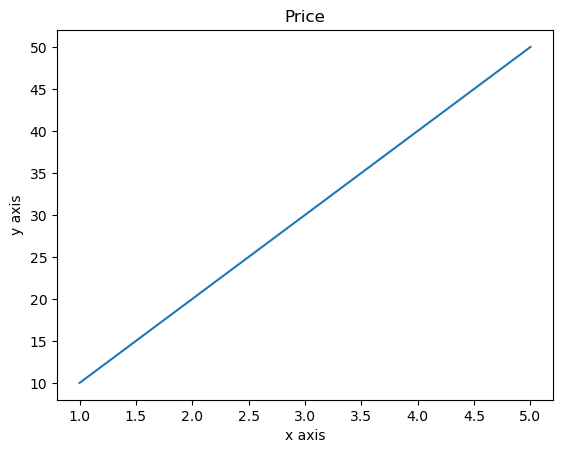

In [178]:
x=np.array([1,2,3,4,5])
y=np.array([10,20,30,40,50])
plt.title("Price")
plt.xlabel("x axis")
plt.ylabel("y axis")
plt.plot(x,y)
plt.show()

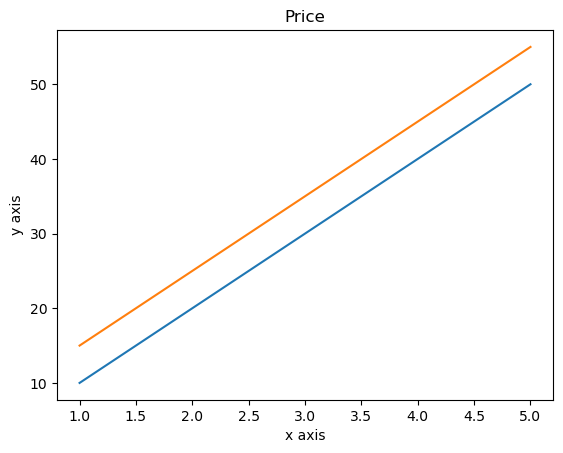

In [180]:
z=np.array([15,25,35,45,55])
plt.title("Price")
plt.xlabel("x axis")
plt.ylabel("y axis")
plt.plot(x,y)
plt.plot(x,z)
plt.show()

## Scatter Plot

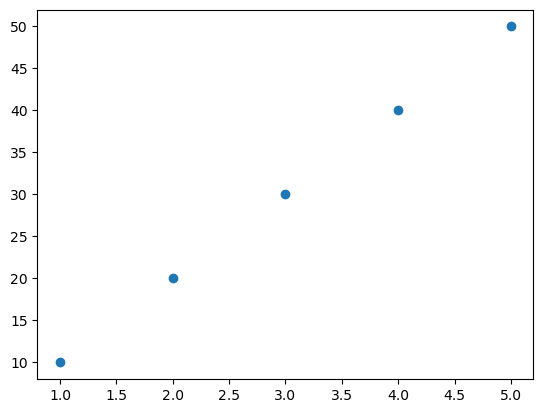

In [176]:
plt.scatter(x,y)

## Bar Chart

<BarContainer object of 6 artists>

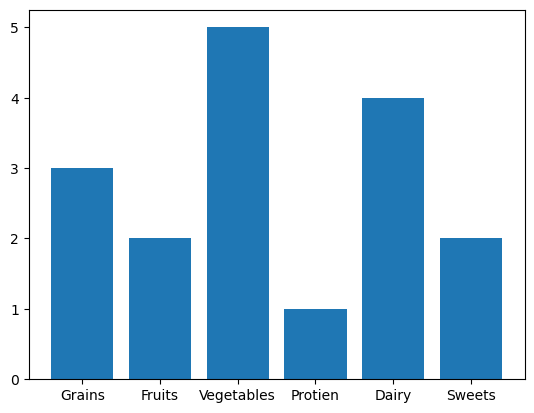

In [181]:
categories=np.array(["Grains","Fruits","Vegetables","Protien","Dairy","Sweets"])
values=np.array([3,2,5,1,4,2])
plt.bar(categories,values)

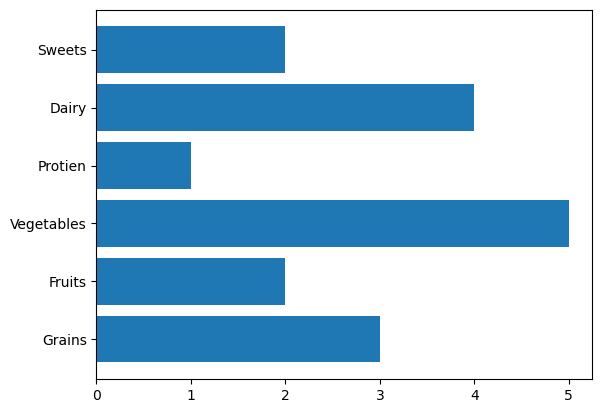

In [182]:
plt.barh(categories,values)
plt.show()

categories

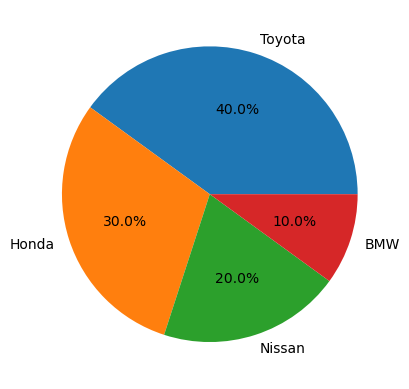

In [200]:
make=df["Make"]
countOfMake=pd.Series(make).value_counts()
# countOfMake
plt.pie(countOfMake, labels=countOfMake.index, autopct='%1.1f%%')
plt.show()


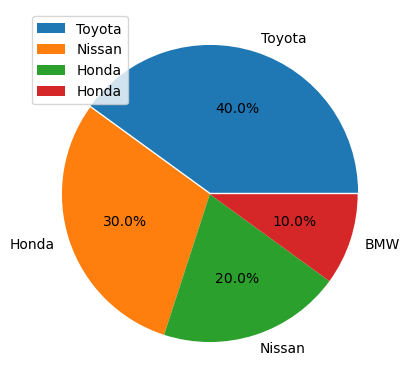

In [204]:
explode=[0.01,0,0,0]
plt.pie(countOfMake, labels=countOfMake.index, autopct='%1.1f%%',explode=explode)
plt.legend(make)
plt.show()

## Histogram

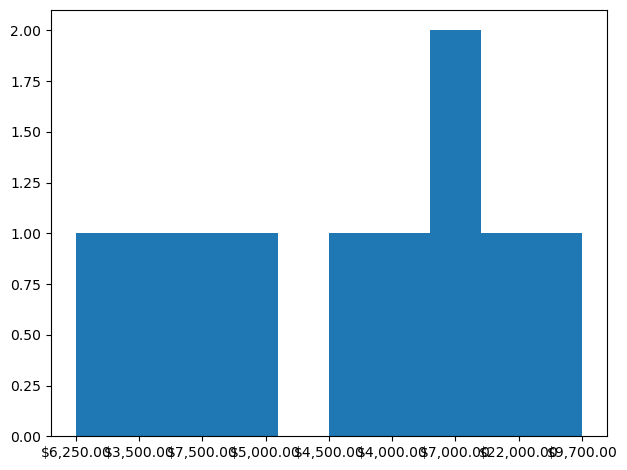

In [212]:
price=df["Price"]
plt.hist(price,bins=10)
plt.tight_layout()

## Subplots

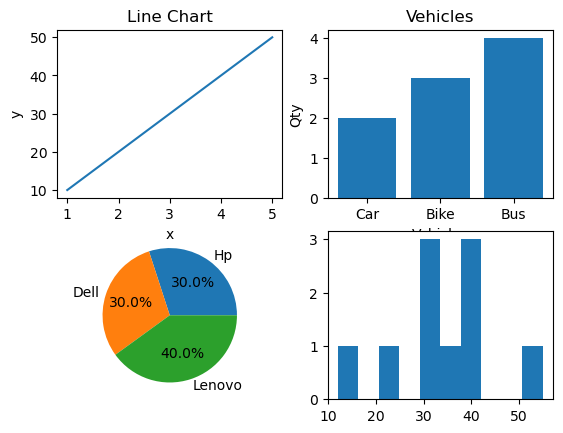

In [223]:
figures,ax=plt.subplots(2,2)

ax[0,0].plot(x,y)
ax[0,0].set_title("Line Chart")
ax[0,0].set_xlabel("x")
ax[0,0].set_ylabel("y")

ax[0,1].bar(["Car","Bike","Bus"],[2,3,4])
ax[0,1].set_title("Vehicles")
ax[0,1].set_xlabel("Vehicles")
ax[0,1].set_ylabel("Qty")

ax[1,0].pie([3,3,4],labels=["Hp","Dell","Lenovo"],autopct='%1.1f%%')

ax[1,1].hist([33,42,32,55,31,36,38,40,12,21],bins=10)




plt.show()

In [234]:
arr=np.random.randint(10,size=(5,5))
arr

array([[4, 6, 8, 4, 9],
       [2, 1, 1, 6, 3],
       [4, 5, 4, 0, 2],
       [8, 0, 7, 6, 5],
       [8, 2, 2, 0, 1]], dtype=int32)